In [3]:
!pip install pandas matplotlib seaborn textblob nltk

In [5]:
# ✅ Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
df = pd.read_csv("C:\\Users\\Dell\\OneDrive\\Desktop\\amazon.csv")  # Use full path
df = df[['product_name', 'review_content']].dropna()
df.head()

,product_name,review_content
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Looks durable Charging is fine tooNo complains...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,I ordered this cable to connect my phone to An...
2,Sounce Fast Phone Charging Cable & Data Sync U...,"Not quite durable and sturdy,https://m.media-a..."
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,"Good product,long wire,Charges good,Nice,I bou..."
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,"Bought this instead of original apple, does th..."


In [15]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [17]:
df['sentiment'] = df['review_content'].apply(get_sentiment)
df.head()

,product_name,review_content,sentiment
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Looks durable Charging is fine tooNo complains...,Positive
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,I ordered this cable to connect my phone to An...,Positive
2,Sounce Fast Phone Charging Cable & Data Sync U...,"Not quite durable and sturdy,https://m.media-a...",Positive
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,"Good product,long wire,Charges good,Nice,I bou...",Positive
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,"Bought this instead of original apple, does th...",Positive


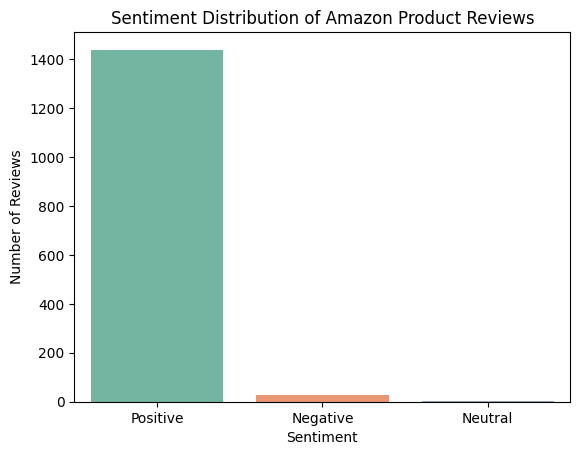

In [21]:
sns.countplot(data=df, x='sentiment', hue='sentiment', palette='Set2', legend=False)
plt.title('Sentiment Distribution of Amazon Product Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

In [23]:
import pandas as pd
from textblob import TextBlob

# Load your dataset
df = pd.read_csv("C:/Users/Dell/OneDrive/Desktop/amazon.csv")  # Update the path if needed
df = df[['product_name', 'review_content']].dropna()

# Improved sentiment function with custom polarity thresholds
def get_sentiment_v2(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity >= 0.3:
        return 'Positive'
    elif polarity <= -0.3:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['sentiment'] = df['review_content'].apply(get_sentiment_v2)

# Display counts of each sentiment
print(df['sentiment'].value_counts())

# Preview updated dataset
df.head()


sentiment
Neutral     907
Positive    557
Negative      1
Name: count, dtype: int64


,product_name,review_content,sentiment
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Looks durable Charging is fine tooNo complains...,Positive
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,I ordered this cable to connect my phone to An...,Neutral
2,Sounce Fast Phone Charging Cable & Data Sync U...,"Not quite durable and sturdy,https://m.media-a...",Positive
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,"Good product,long wire,Charges good,Nice,I bou...",Neutral
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,"Bought this instead of original apple, does th...",Neutral


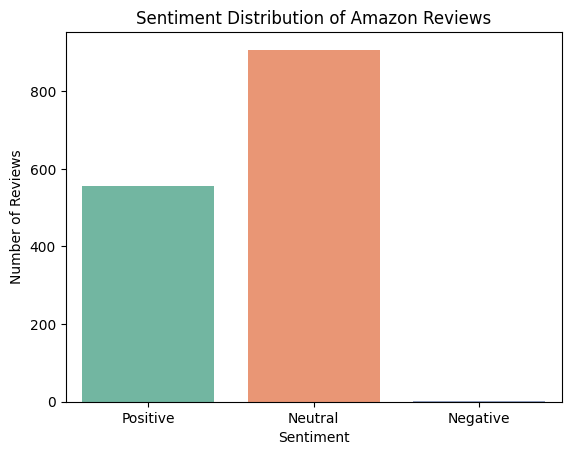

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='sentiment', hue='sentiment', palette='Set2', legend=False)
plt.title('Sentiment Distribution of Amazon Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


In [29]:
!pip install wordcloud


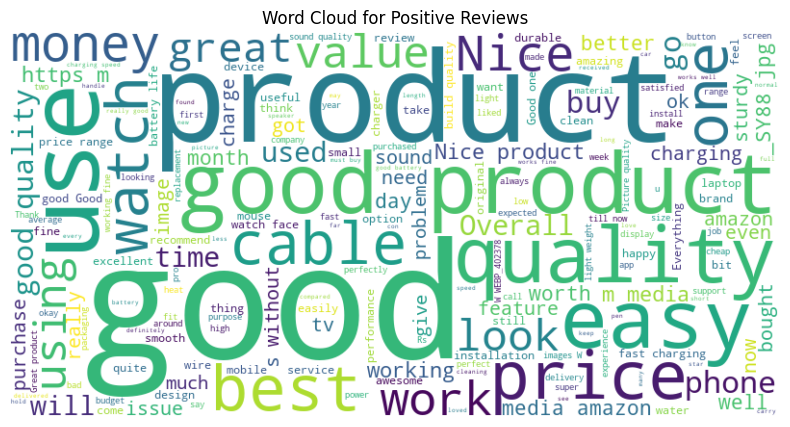

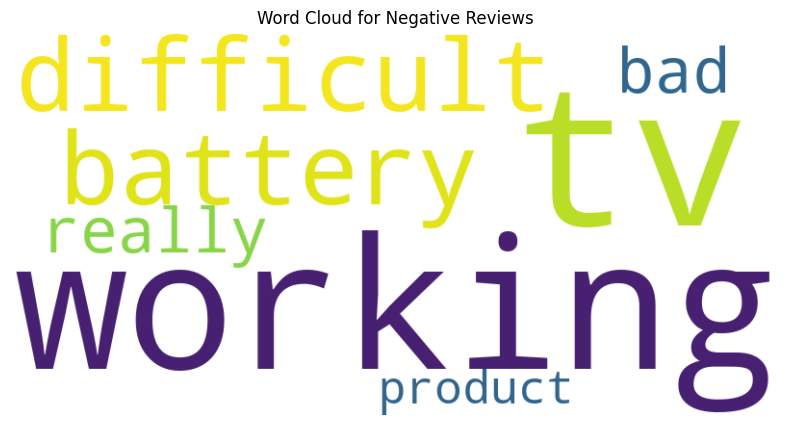

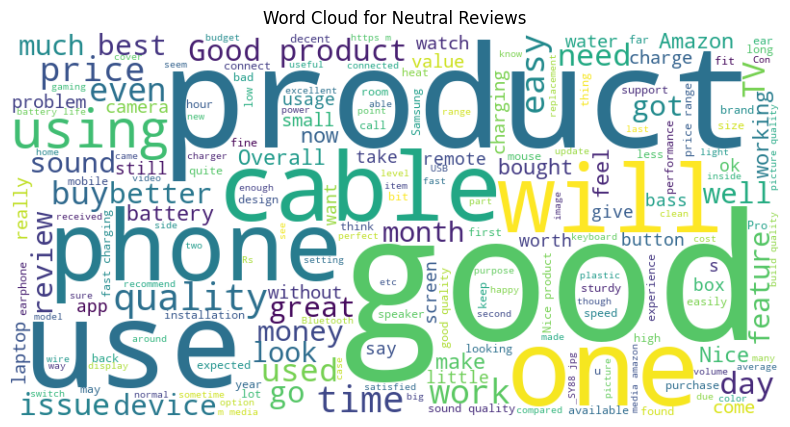

In [31]:
from wordcloud import WordCloud

# Generate word clouds by sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    text = " ".join(df[df['sentiment'] == sentiment]['review_content'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.show()


In [33]:
df.to_csv("amazon_reviews_with_sentiment.csv", index=False)
print("Saved as 'amazon_reviews_with_sentiment.csv'")


Saved as 'amazon_reviews_with_sentiment.csv'


In [35]:
sentiment_by_product = df.groupby(['product_name', 'sentiment']).size().unstack(fill_value=0)
sentiment_by_product.head()


sentiment,Negative,Neutral,Positive
product_name,,,
!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!,0,1,0
!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!Thermoset!!,0,0,1
"10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor",0,0,1
"10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox",0,0,1
"3M Post-it Sticky Note Cube, 200 Sheets (4 Colors x 50 Sheets) | 3"" x 3"" Size | For notes, reminders, study, school and organizing",0,0,1


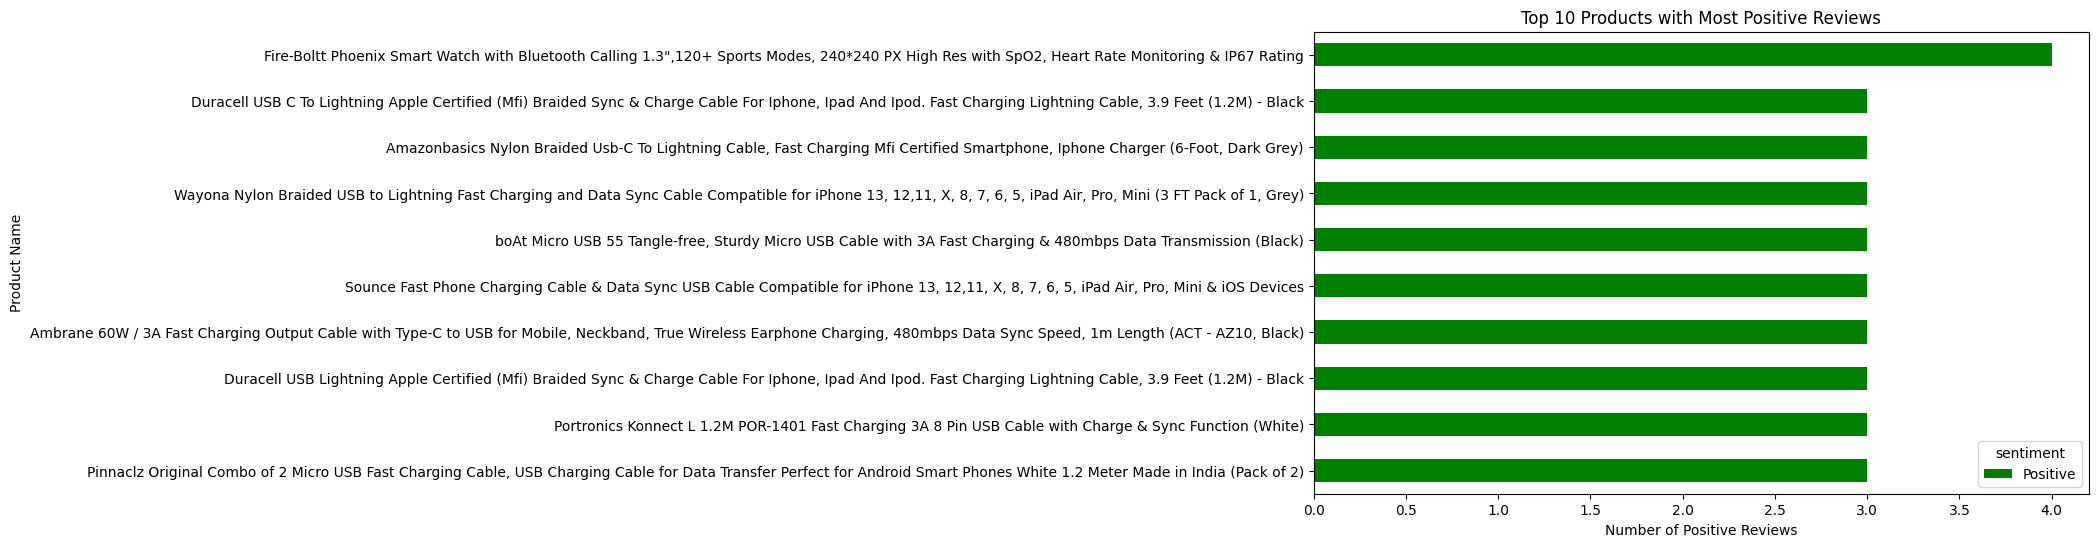

In [37]:
top_positive = sentiment_by_product.sort_values(by='Positive', ascending=False).head(10)
top_positive[['Positive']].plot(kind='barh', color='green', figsize=(10, 6))
plt.title('Top 10 Products with Most Positive Reviews')
plt.xlabel('Number of Positive Reviews')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()
plt.show()


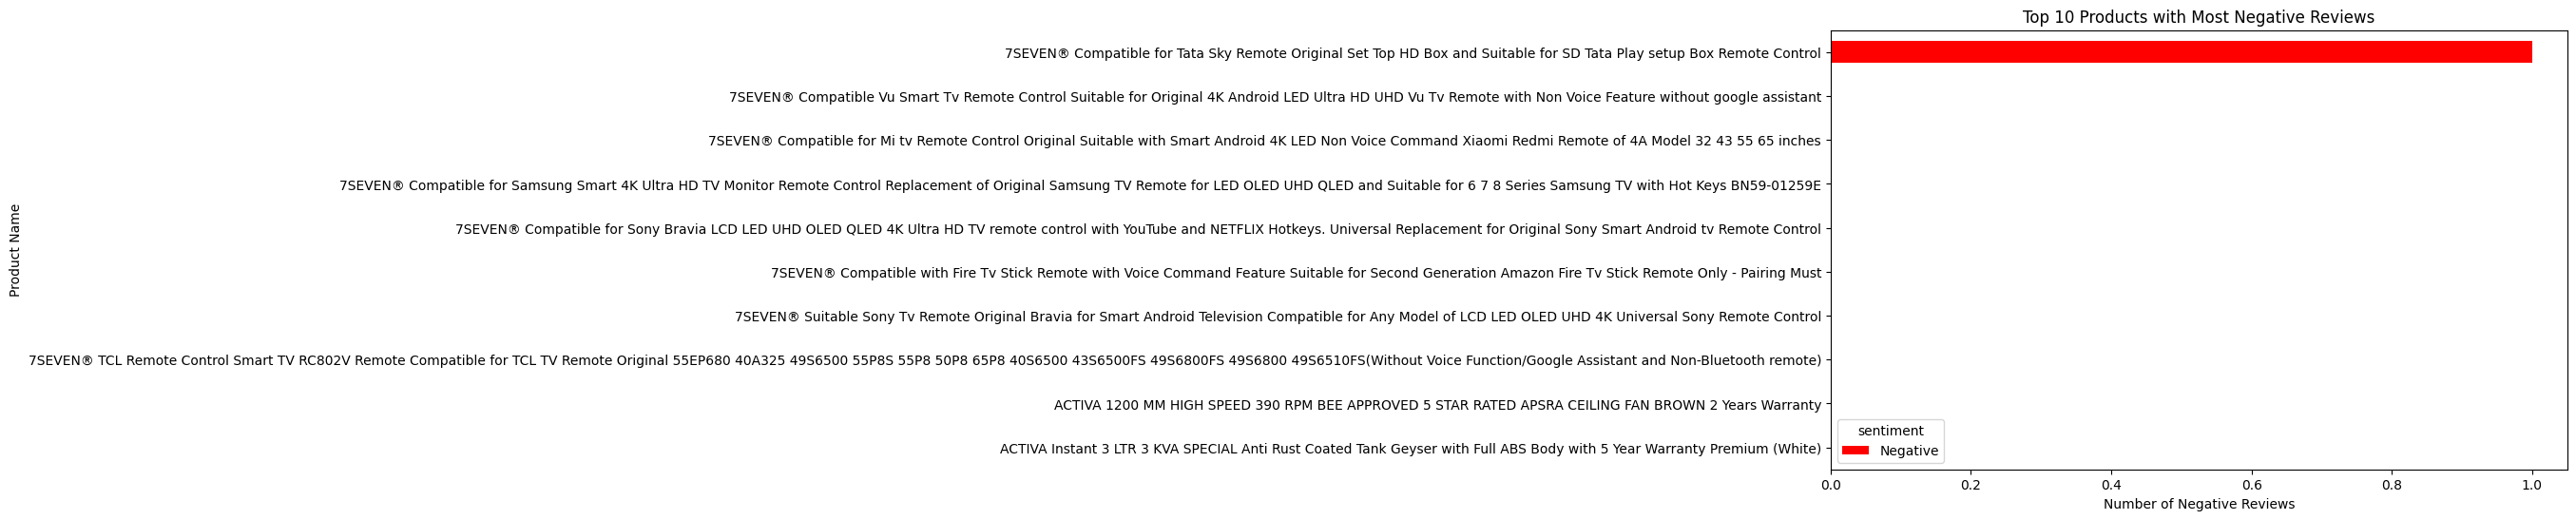

In [39]:
top_negative = sentiment_by_product.sort_values(by='Negative', ascending=False).head(10)
top_negative[['Negative']].plot(kind='barh', color='red', figsize=(10, 6))
plt.title('Top 10 Products with Most Negative Reviews')
plt.xlabel('Number of Negative Reviews')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()
plt.show()


In [41]:
# Group by product and sentiment
sentiment_summary = df.groupby(['product_name', 'sentiment']).size().unstack(fill_value=0)

# Add a Total Reviews column and Positive Ratio
sentiment_summary['Total_Reviews'] = sentiment_summary.sum(axis=1)
sentiment_summary['Positive_Ratio'] = sentiment_summary['Positive'] / sentiment_summary['Total_Reviews']
sentiment_summary = sentiment_summary.sort_values(by='Total_Reviews', ascending=False)

sentiment_summary.head(10)


sentiment,Negative,Neutral,Positive,Total_Reviews,Positive_Ratio
product_name,,,,,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",0,5,0,5,0.0
"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",0,0,4,4,1.0
"pTron Solero TB301 3A Type-C Data and Fast Charging Cable, Made in India, 480Mbps Data Sync, Strong and Durable 1.5-Meter Nylon Braided USB Cable for Type-C Devices for Charging Adapter (Black)",0,0,3,3,1.0
"Ambrane 60W / 3A Fast Charging Output Cable with Type-C to USB for Mobile, Neckband, True Wireless Earphone Charging, 480mbps Data Sync Speed, 1m Length (ACT - AZ10, Black)",0,0,3,3,1.0
"AmazonBasics New Release Nylon USB-A to Lightning Cable Cord, Fast Charging MFi Certified Charger for Apple iPhone, iPad (6-Ft, Rose Gold)",0,3,0,3,0.0
"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",0,3,0,3,0.0
"Amazon Basics USB Type-C to USB-A 2.0 Male Fast Charging Cable for Laptop - 3 Feet (0.9 Meters), Black",0,3,0,3,0.0
"Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)",0,0,3,3,1.0
"Fire-Boltt Visionary 1.78"" AMOLED Bluetooth Calling Smartwatch with 368*448 Pixel Resolution 100+ Sports Mode, TWS Connection, Voice Assistance, SPO2 & Heart Rate Monitoring",0,0,3,3,1.0


In [43]:
# Best rated products by positive ratio (with at least 5 reviews)
best_products = sentiment_summary[sentiment_summary['Total_Reviews'] >= 5].sort_values(by='Positive_Ratio', ascending=False).head(5)
print("🔝 Top 5 Best Rated Products:\n", best_products[['Positive', 'Negative', 'Neutral', 'Positive_Ratio']])

# Worst rated products by positive ratio
worst_products = sentiment_summary[sentiment_summary['Total_Reviews'] >= 5].sort_values(by='Positive_Ratio').head(5)
print("\n⚠️  Top 5 Worst Rated Products:\n", worst_products[['Positive', 'Negative', 'Neutral', 'Positive_Ratio']])


🔝 Top 5 Best Rated Products:
 sentiment                                           Positive  Negative  \
product_name                                                             
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watc...         0         0   

sentiment                                           Neutral  Positive_Ratio  
product_name                                                                 
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watc...        5             0.0  

⚠️  Top 5 Worst Rated Products:
 sentiment                                           Positive  Negative  \
product_name                                                             
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watc...         0         0   

sentiment                                           Neutral  Positive_Ratio  
product_name                                                                 
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watc...        5             0.0  
